In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline



In [ ]:
cells2 = pd.read_pickle('cells2_salil' )

In [3]:
cells2.head()

,Unnamed: 0,ClusterID,EventID,File Name,Region,TMA_AB,TMA_12,Index in File,groups,patients,...,1,2,3,4,5,6,7,8,9,tumor or cd8lag3
0,0,10668,0,reg001_A,reg001,A,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
1,1,10668,4,reg001_A,reg001,A,1,4,1,1,...,0,0,0,1,0,0,0,0,0,0
2,2,10668,5,reg001_A,reg001,A,1,5,1,1,...,0,0,1,0,0,0,0,0,0,0
3,3,10668,6,reg001_A,reg001,A,1,6,1,1,...,0,0,1,0,0,0,0,0,0,0
4,4,10668,30,reg001_A,reg001,A,1,30,1,1,...,0,0,0,1,0,0,0,0,0,0


In [4]:
cells2['CD4notTreg'] = np.bitwise_and(cells2['CD4+']==1,cells2['CD25+FOXP3+']==0)

cells2['CD4notTregchkpt'] = np.bitwise_and(cells2['CD4notTreg'],cells2[['CD4+ICOS+','CD4+Ki67+','CD4+PD-1+']].sum(1)>0)
cells2['CD4notTregchklo'] = np.bitwise_and(cells2['CD4notTreg'],cells2[['CD4+ICOS+','CD4+Ki67+','CD4+PD-1+']].sum(1)==0)

cells2['Tregchkpt'] = cells2[['Treg-ICOS+','Treg-Ki67+','Treg-PD-1+']].sum(1)>0
cells2['Tregchklo'] = np.bitwise_and(cells2['CD25+FOXP3+']==1,cells2[['Treg-ICOS+','Treg-Ki67+','Treg-PD-1+']].sum(1)==0)

cells2['CD8chkpt'] = cells2[['CD8+ICOS+','CD8+Ki67+','CD8+PD-1+']].sum(1)>0
cells2['CD8+chklo'] = np.bitwise_and(cells2['CD8+']==1,cells2[['CD8+ICOS+','CD8+Ki67+','CD8+PD-1+']].sum(1)==0)

In [5]:

chkpt3 = ['CD4notTregchkpt','CD8chkpt','Tregchkpt','CD4notTregchklo','CD8+chklo','Tregchklo']
densities = cells2[cells2['neighborhood10']!=1].groupby(['groups','patients','neighborhood10']).apply(lambda x:x[chkpt3].sum(0))
Dens = densities.dropna((0,1),how = 'all')


/home/graham/anaconda3/envs/hier/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  after removing the cwd from sys.path.


In [6]:
Dens.head()

CD4notTregchkpt  CD8chkpt  Tregchkpt  \
groups patients neighborhood10                                         
1      1        0                           1.0       0.0        1.0   
                2                           3.0       0.0        0.0   
                3                           0.0       0.0        2.0   
                4                           5.0       1.0        2.0   
                5                           0.0       0.0        0.0   

                                CD4notTregchklo  CD8+chklo  Tregchklo  
groups patients neighborhood10                                         
1      1        0                         152.0       68.0       13.0  
                2                           3.0        7.0        4.0  
                3                          21.0       10.0        8.0  
                4                          73.0       49.0       13.0  
                5                          18.0        9.0        0.0

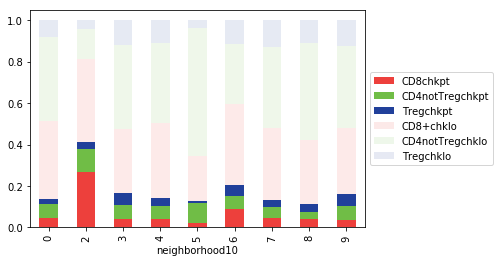

In [7]:
f,ax = plt.subplots()
k = Dens.sum(level = 'neighborhood10').transform(lambda x: x/x.sum(),axis = 1)
k.loc[[0,2,3,4,5,6,7,8,9],:].iloc[:,[1,0,2]].plot(kind = 'bar',ax = ax,stacked = True,alpha = 1,
                                             color = ['#ED403C','#70BD46','#21409A'])

k.loc[[0,2,3,4,5,6,7,8,9],:].iloc[:,[4,3,5]].plot(kind = 'bar',stacked = True,alpha = .11,bottom =k.loc[[0,2,3,4,5,6,7,8,9],:].iloc[:,:3].sum(1),ax = ax,
                                             color = ['#ED403C','#70BD46','#21409A'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),)
# plt.ylim(0,.6)

In [11]:
colss = [['CD4+ICOS+', 'CD4+Ki67+', 'CD4+PD-1+'],
 ['CD8+ICOS+', 'CD8+Ki67+', 'CD8+PD-1+'],
 ['Treg-ICOS+', 'Treg-Ki67+', 'Treg-PD-1+']]

In [13]:
d = cells2.groupby(['groups','patients','neighborhood10']).apply(lambda x: x[[a for b in colss for a in b]].sum(0))

s

In [14]:
d.head()

CD4+ICOS+  CD4+Ki67+  CD4+PD-1+  CD8+ICOS+  \
groups patients neighborhood10                                               
1      1        0                     1.0        0.0        1.0        0.0   
                1                     0.0        0.0        0.0        0.0   
                2                     0.0        3.0        0.0        0.0   
                3                     3.0        0.0        0.0        0.0   
                4                     1.0        2.0        5.0        0.0   

                                CD8+Ki67+  CD8+PD-1+  Treg-ICOS+  Treg-Ki67+  \
groups patients neighborhood10                                                 
1      1        0                     0.0        0.0         1.0         0.0   
                1                     0.0        0.0         0.0         0.0   
                2                     0.0        0.0         0.0         0.0   
                3                     0.0        0.0         2.0         0.0   
                4                     1.0        0.0         1.0         2.0   

                                Treg-PD-1+  
groups patients neighborhood10              
1      1        0                      0.0  
                1                      0.0  
                2                      0.0  
                3                      0.0  
                4                      0.0

In [16]:
def print_pvals(l):
    pvals = {}
    for i in [0,1,2]:
        chkpval = {}
        for n1 in [0,4,6,2]:
            for n2 in [0,4,6,2]:
                key = [n1,n2]
                key.sort()
                if tuple(key) not in chkpval:
                    i1 = l.loc[ix[:,:,n1],:].iloc[:,i]
                    i2 = l.loc[ix[:,:,n2],:].iloc[:,i]
                    pval = ttest_ind(i1.values,i2.values)[1]
                    chkpval[tuple(key)] = pval
        pvals[i] = chkpval
    return (pvals)

{0: {(0, 0): 1.0, (0, 4): 0.8142682852696997, (0, 6): 0.11197319141198148, (0, 2): 0.017262622029582946, (4, 4): 1.0, (4, 6): 0.16446429734089146, (2, 4): 0.011580990923747795, (6, 6): 1.0, (2, 6): 0.003717364747116236, (2, 2): 1.0}, 1: {(0, 0): 1.0, (0, 4): 0.4899732795321392, (0, 6): 0.7593375840482115, (0, 2): 0.04763872411919556, (4, 4): 1.0, (4, 6): 0.8452272875437177, (2, 4): 0.09351264554059562, (6, 6): 1.0, (2, 6): 0.16743876165974997, (2, 2): 1.0}, 2: {(0, 0): 1.0, (0, 4): 0.5081328065173242, (0, 6): 0.05354619761987192, (0, 2): 0.5728979434396093, (4, 4): 1.0, (4, 6): 0.15024549534079534, (2, 4): 0.29356955674512125, (6, 6): 1.0, (2, 6): 0.0585244225290342, (2, 2): 1.0}}


/home/graham/anaconda3/envs/hier/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


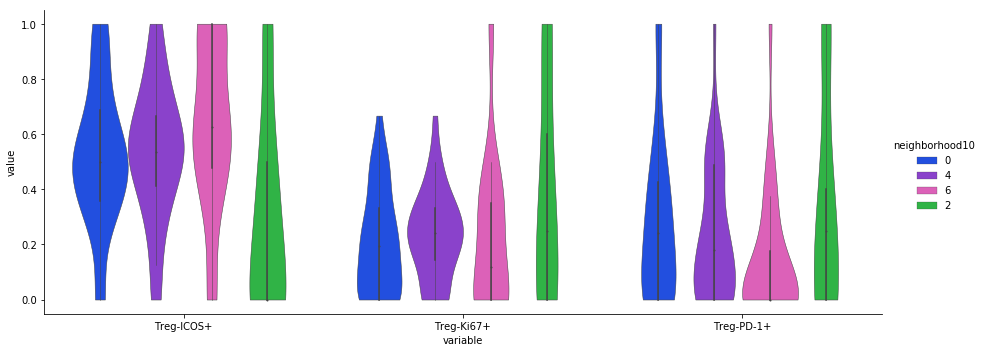

{0: {(0, 0): 1.0, (0, 4): 0.5351318112177568, (0, 6): 0.6958257100830529, (0, 2): 0.0007879255099674835, (4, 4): 1.0, (4, 6): 0.34845220408600563, (2, 4): 0.007004829843566377, (6, 6): 1.0, (2, 6): 0.0008401792511387111, (2, 2): 1.0}, 1: {(0, 0): 1.0, (0, 4): 0.07250935978405985, (0, 6): 0.1319906377971019, (0, 2): 0.0005016659941256934, (4, 4): 1.0, (4, 6): 0.9805672039915465, (2, 4): 0.009224997635145454, (6, 6): 1.0, (2, 6): 0.01718812343196299, (2, 2): 1.0}, 2: {(0, 0): 1.0, (0, 4): 0.6324690320168597, (0, 6): 0.1674674747268574, (0, 2): 0.74318473856685, (4, 4): 1.0, (4, 6): 0.3580021298114343, (2, 4): 0.9837277242474918, (6, 6): 1.0, (2, 6): 0.4903730365758523, (2, 2): 1.0}}


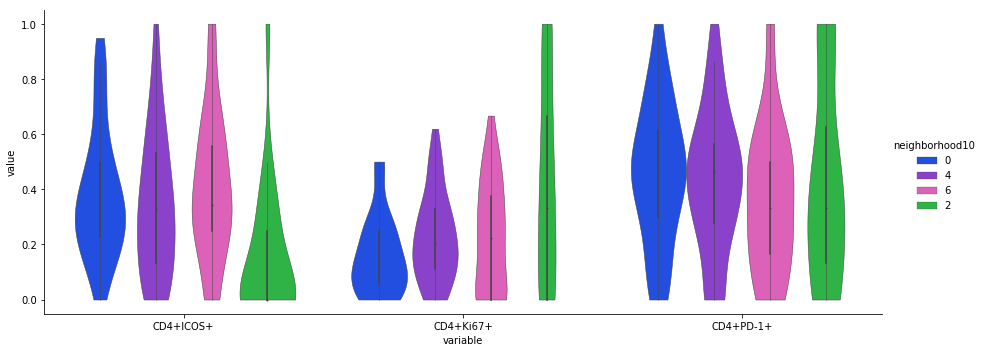

{0: {(0, 0): 1.0, (0, 4): 0.8575434249087234, (0, 6): 0.8907076679397673, (0, 2): 0.005427905581846447, (4, 4): 1.0, (4, 6): 0.766507075064605, (2, 4): 0.008429094178866333, (6, 6): 1.0, (2, 6): 0.012015139207313782, (2, 2): 1.0}, 1: {(0, 0): 1.0, (0, 4): 0.5353541791103209, (0, 6): 0.4162887639486722, (0, 2): 0.1297928670218172, (4, 4): 1.0, (4, 6): 0.17264934290860107, (2, 4): 0.040278460582051354, (6, 6): 1.0, (2, 6): 0.5263376150106585, (2, 2): 1.0}, 2: {(0, 0): 1.0, (0, 4): 0.46705358606468084, (0, 6): 0.3692151543898917, (0, 2): 0.5844315041642214, (4, 4): 1.0, (4, 6): 0.12988570653281478, (2, 4): 0.9250158904349034, (6, 6): 1.0, (2, 6): 0.2126505380131088, (2, 2): 1.0}}


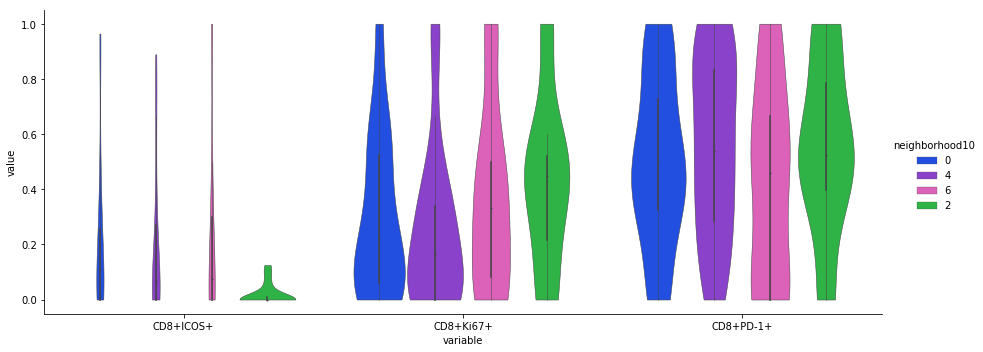

In [27]:
ix = pd.IndexSlice
for i in [2,0,1]:
    l = d.loc[ix[:,:,[0,4,6,2]],colss[i]].transform(lambda x: x/x.sum(),1).dropna(how = 'all')
    print (print_pvals(l))
    lm = l.reset_index().melt(id_vars = ['groups','patients','neighborhood10'])
    sns.catplot(data = lm, hue_order = [0,4,6,2],hue = 'neighborhood10',
                dodge = True,x =  'variable',y = 'value' ,
#                 errwidth = 1,capsize = .05,saturation = 1,
                kind = 'violin',cut = 0,aspect = 2.5,linewidth = .5,
                palette = {i:sns.color_palette('bright')[i] for i in [0,4,6,2]}
                
            )
#     plt.savefig('raw_figs/'+'fig6chkviolin'+colss[i][0][:4]+'.pdf')
    plt.show()
